In [188]:
import pandas as pd

import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
from datetime import datetime
import os,warnings

import tensorflow as tf

from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,Input,Conv2D,BatchNormalization,Conv2DTranspose,Activation,concatenate

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
import xgboost as xgb

import seaborn as sns
from matplotlib.colors import ListedColormap

warnings.filterwarnings('ignore')

In [112]:
df = pd.read_csv('Data\\countries_of_the_world.csv')

for col in df.select_dtypes(include=['object']).drop(['Country','Region'],axis=1).columns:
    df[col]=df[col].apply(lambda x: str(x).replace(',','.'))

for col in df.select_dtypes(include=['object']).drop(['Country','Region'],axis=1).columns:
    df[col]=df[col].astype('float')

df=df.set_index('Country',drop=True)
dict_region=dict(enumerate(df['Region'].astype('category').cat.categories))
df['Region']=df['Region'].astype('category').cat.codes

df['Literacy (%)']=df['Literacy (%)'].fillna(df['Literacy (%)'].min())
df['Climate']=df['Climate'].fillna(df['Climate'].mean())
df['Agriculture']=df['Agriculture'].fillna(df['Agriculture'].min())
df['Industry']=df['Industry'].fillna(df['Industry'].min())
df['Service']=df['Service'].fillna(df['Service'].min())
df['Deathrate']=df['Deathrate'].fillna(df['Deathrate'].max())
df['Net migration']=df['Net migration'].fillna(df['Net migration'].mean())
df['Arable (%)']=df['Arable (%)'].fillna(df['Arable (%)'].min())
df['Crops (%)']=df['Crops (%)'].fillna(df['Crops (%)'].min())
df['Other (%)']=df['Other (%)'].fillna(df['Other (%)'].min())
df['Infant mortality (per 1000 births)']=df['Infant mortality (per 1000 births)'].fillna(df['Infant mortality (per 1000 births)'].max())
df['Birthrate']=df['Birthrate'].fillna(df['Birthrate'].max())
df['GDP ($ per capita)']=df['GDP ($ per capita)'].fillna(df['GDP ($ per capita)'].max())
df['Phones (per 1000)']=df['Phones (per 1000)'].fillna(df['Phones (per 1000)'].mean())

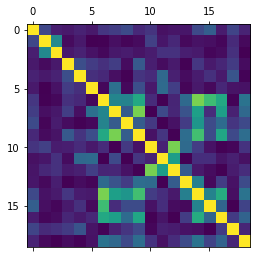

In [113]:
plt.matshow(df.corr().abs())

In [114]:
df.isnull().sum()

Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

In [115]:
knn = NearestNeighbors()
nbrs = knn.fit(df.values)
dist,ind = nbrs.kneighbors()

gmm = GaussianMixture(n_components=5)
gmm.fit(df)
labels = gmm.predict(df)
df['GMM class'] = labels

kmeans = KMeans(n_clusters=5,random_state=0)
clusters = kmeans.fit(df.values)

pca = PCA(n_components=2)
rf = pca.fit_transform(df.values)
print('PCA explained variances: '+str(pca.explained_variance_ratio_))
sorted_indices = np.argsort(pca.components_[0])[::-1]
pca0sorted = pca.components_[0][sorted_indices]
sorted_cols = df.columns[sorted_indices]

df['pca0'] = rf[:,0]
df['pca1'] = rf[:,1]
df['K-Means']=clusters.labels_

PCA explained variances: [9.99820371e-01 1.79621463e-04]


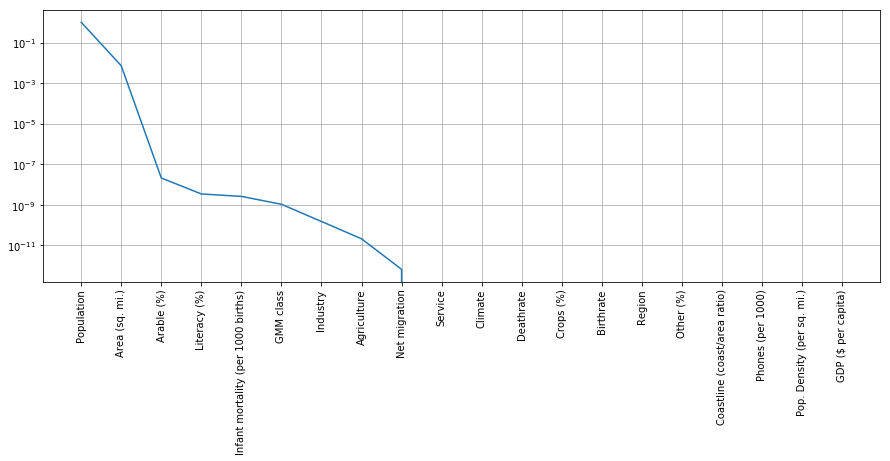

In [116]:
fig = plt.figure(figsize=(15,5))

plt.xticks(range(len(pca.components_[0])),sorted_cols,rotation=90)
plt.semilogy(pca0sorted)
plt.grid()

plt.show()

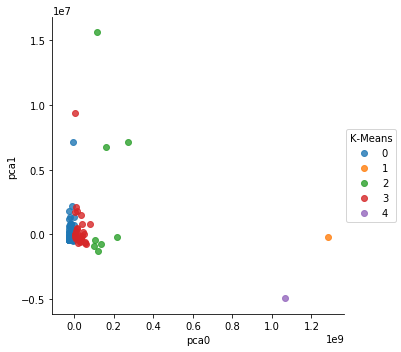

In [117]:
sns.lmplot(x='pca0',y='pca1',data=df,hue='K-Means',fit_reg=False)

In [118]:
df[sorted_cols]

Population  Area (sq. mi.)  Arable (%)  Literacy (%)  \
Country                                                                       
Afghanistan              31056997          647500       12.13          36.0   
Albania                   3581655           28748       21.09          86.5   
Algeria                  32930091         2381740        3.22          70.0   
American Samoa              57794             199       10.00          97.0   
Andorra                     71201             468        2.22         100.0   
Angola                   12127071         1246700        2.41          42.0   
Anguilla                    13477             102        0.00          95.0   
Antigua & Barbuda           69108             443       18.18          89.0   
Argentina                39921833         2766890       12.31          97.1   
Armenia                   2976372           29800       17.55          98.6   
Aruba                       71891             193       10.53          97.0   
Australia                20264082         7686850        6.55         100.0   
Austria                   8192880           83870       16.91          98.0   
Azerbaijan                7961619           86600       19.63          97.0   
Bahamas, The               303770           13940        0.80          95.6   
Bahrain                    698585             665        2.82          89.1   
Bangladesh              147365352          144000       62.11          43.1   
Barbados                   279912             431       37.21          97.4   
Belarus                  10293011          207600       29.55          99.6   
Belgium                  10379067           30528       23.28          98.0   
Belize                     287730           22966        2.85          94.1   
Benin                     7862944          112620       18.08          40.9   
Bermuda                     65773              53       20.00          98.0   
Bhutan                    2279723           47000        3.09          42.2   
Bolivia                   8989046         1098580        2.67          87.2   
Bosnia & Herzegovina      4498976           51129       13.60          17.6   
Botswana                  1639833          600370        0.65          79.8   
Brazil                  188078227         8511965        6.96          86.4   
British Virgin Is.          23098             153       20.00          97.8   
Brunei                     379444            5770        0.57          93.9   
...                           ...             ...         ...           ...   
Syria                    18881361          185180       25.22          76.9   
Taiwan                   23036087           35980       24.00          96.1   
Tajikistan                7320815          143100        6.61          99.4   
Tanzania                 37445392          945087        4.52          78.2   
Thailand                 64631595          514000       29.36          92.6   
Togo                      5548702           56785       46.15          60.9   
Tonga                      114689             748       23.61          98.5   
Trinidad & Tobago         1065842            5128       14.62          98.6   
Tunisia                  10175014          163610       17.86          74.2   
Turkey                   70413958          780580       30.93          86.5   
Turkmenistan              5042920          488100        3.72          98.0   
Turks & Caicos Is           21152             430        2.33          98.0   
Tuvalu                      11810              26        0.00          17.6   
Uganda                   28195754          236040       25.88          69.9   
Ukraine                  46710816          603700       56.21          99.7   
United Arab Emirates      2602713           82880        0.60          77.9   
United Kingdom           60609153          244820       23.46          99.0   
United States           298444215         9631420       19.13          97

In [120]:
df.columns

Index(['Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'GMM class', 'pca0', 'pca1', 'K-Means'],
      dtype='object')

In [320]:
dff = df[[
    'Region', 
    'Population', 
    'Area (sq. mi.)', 
    'Pop. Density (per sq. mi.)',
    'Coastline (coast/area ratio)', 
    'Net migration',
    'GDP ($ per capita)',
    #'Arable (%)', 
    #'Crops (%)',
    #'Other (%)', 
    #'Climate', 
    #'Agriculture',
    #'Industry', 
    #'Service'
]]

In [321]:
dffx,dffy0,dffy1 = dff,dff.pop('GDP ($ per capita)'),dff.pop('Net migration')

In [322]:
kbd0 = KBinsDiscretizer(n_bins=25,encode='ordinal')
kbd0.fit(dffy1.values.reshape(-1,1))
dffy = kbd0.transform(dffy1.values.reshape(-1,1))

In [323]:
kbd1 = KBinsDiscretizer(n_bins=10,encode='ordinal')
dffx['Population'] = kbd1.fit_transform(dffx['Population'].values.reshape(-1,1))

In [324]:
kbd2 = KBinsDiscretizer(n_bins=10,encode='ordinal')
dffx['Area (sq. mi.)'] = kbd2.fit_transform(dffx['Area (sq. mi.)'].values.reshape(-1,1))

In [325]:
kbd3 = KBinsDiscretizer(n_bins=10,encode='ordinal')
dffx['Pop. Density (per sq. mi.)'] = kbd3.fit_transform(dffx['Pop. Density (per sq. mi.)'].values.reshape(-1,1))

In [326]:
dffx = pd.get_dummies(dffx,columns=['Region','Population','Area (sq. mi.)','Pop. Density (per sq. mi.)'])

In [327]:
DATA = dffx.values
LABELS = dffy

In [328]:
ohe = OneHotEncoder()
LABELS = ohe.fit_transform(LABELS).todense()

In [329]:
stsc = StandardScaler().fit(DATA)
DATA = stsc.transform(DATA)

In [330]:
Xtrain,Xtest,ytrain,ytest = train_test_split(DATA,LABELS,test_size=0.25,shuffle=True)

In [331]:
actfn = 'tanh'

in0 = Input(shape=(Xtrain.shape[1],))
x = Dense(units=250,activation=actfn)(in0)
x = BatchNormalization()(x)
x = Dense(units=500,activation=actfn)(x)
x = BatchNormalization()(x)
x = Dense(units=100,activation=actfn)(x)
x = Dropout(rate=0.25)(x)
out0 = Dense(units=ytrain.shape[1],activation='softmax')(x)

model = Model(in0,out0)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [332]:
model.fit(Xtrain,ytrain,batch_size=5,epochs=1000,validation_split=0.2)
model.evaluate(Xtest,ytest)

Train on 136 samples, validate on 34 samples
Epoch 1/1000
136/136 [==============================] - 6s 42ms/step - loss: 3.4164 - categorical_accuracy: 0.1029 - val_loss: 3.4484 - val_categorical_accuracy: 0.0882
Epoch 2/1000
136/136 [==============================] - 0s 3ms/step - loss: 2.1132 - categorical_accuracy: 0.4044 - val_loss: 3.3963 - val_categorical_accuracy: 0.1176
Epoch 3/1000
136/136 [==============================] - 0s 4ms/step - loss: 1.8090 - categorical_accuracy: 0.4706 - val_loss: 3.3588 - val_categorical_accuracy: 0.0882
Epoch 4/1000
136/136 [==============================] - 1s 5ms/step - loss: 1.6495 - categorical_accuracy: 0.5515 - val_loss: 3.3660 - val_categorical_accuracy: 0.1176
Epoch 5/1000
136/136 [==============================] - 1s 4ms/step - loss: 1.2653 - categorical_accuracy: 0.6324 - val_loss: 3.3867 - val_categorical_accuracy: 0.1176
Epoch 6/1000
136/136 [==============================] - 0s 3ms/step - loss: 1.2652 - categorical_accuracy: 0.6765 

136/136 [==============================] - 0s 3ms/step - loss: 0.4901 - categorical_accuracy: 0.8750 - val_loss: 4.5803 - val_categorical_accuracy: 0.0588
Epoch 50/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.3362 - categorical_accuracy: 0.9412 - val_loss: 4.7382 - val_categorical_accuracy: 0.0588
Epoch 51/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.4019 - categorical_accuracy: 0.8897 - val_loss: 4.5145 - val_categorical_accuracy: 0.0588
Epoch 52/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.3294 - categorical_accuracy: 0.8824 - val_loss: 4.4521 - val_categorical_accuracy: 0.0588
Epoch 53/1000
136/136 [==============================] - 0s 4ms/step - loss: 0.3979 - categorical_accuracy: 0.8897 - val_loss: 4.6665 - val_categorical_accuracy: 0.0588
Epoch 54/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.3603 - categorical_accuracy: 0.8676 - val_loss: 4.7754 - val_categorical_accuracy: 0.0588


136/136 [==============================] - 0s 3ms/step - loss: 0.3958 - categorical_accuracy: 0.8824 - val_loss: 5.2977 - val_categorical_accuracy: 0.1176
Epoch 98/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2705 - categorical_accuracy: 0.9044 - val_loss: 5.4236 - val_categorical_accuracy: 0.0588
Epoch 99/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.3053 - categorical_accuracy: 0.9044 - val_loss: 5.2452 - val_categorical_accuracy: 0.0882
Epoch 100/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.3240 - categorical_accuracy: 0.9044 - val_loss: 5.5359 - val_categorical_accuracy: 0.0882
Epoch 101/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1842 - categorical_accuracy: 0.9265 - val_loss: 5.6799 - val_categorical_accuracy: 0.1176
Epoch 102/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.3737 - categorical_accuracy: 0.8897 - val_loss: 5.1744 - val_categorical_accuracy: 0.05

136/136 [==============================] - 1s 4ms/step - loss: 0.3066 - categorical_accuracy: 0.9044 - val_loss: 5.5684 - val_categorical_accuracy: 0.1176
Epoch 146/1000
136/136 [==============================] - 1s 5ms/step - loss: 0.4036 - categorical_accuracy: 0.8897 - val_loss: 5.5702 - val_categorical_accuracy: 0.1176
Epoch 147/1000
136/136 [==============================] - 1s 5ms/step - loss: 0.2487 - categorical_accuracy: 0.9118 - val_loss: 5.5105 - val_categorical_accuracy: 0.1471
Epoch 148/1000
136/136 [==============================] - 1s 5ms/step - loss: 0.2354 - categorical_accuracy: 0.9191 - val_loss: 5.6853 - val_categorical_accuracy: 0.0882
Epoch 149/1000
136/136 [==============================] - 1s 5ms/step - loss: 0.2576 - categorical_accuracy: 0.9118 - val_loss: 5.7368 - val_categorical_accuracy: 0.2059
Epoch 150/1000
136/136 [==============================] - 1s 5ms/step - loss: 0.2194 - categorical_accuracy: 0.9485 - val_loss: 5.7825 - val_categorical_accuracy: 0.

136/136 [==============================] - 0s 3ms/step - loss: 0.2001 - categorical_accuracy: 0.9412 - val_loss: 5.5895 - val_categorical_accuracy: 0.1471
Epoch 193/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1735 - categorical_accuracy: 0.9559 - val_loss: 5.5892 - val_categorical_accuracy: 0.1176
Epoch 194/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2126 - categorical_accuracy: 0.9191 - val_loss: 5.5383 - val_categorical_accuracy: 0.1471
Epoch 195/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2213 - categorical_accuracy: 0.9044 - val_loss: 6.1507 - val_categorical_accuracy: 0.0882
Epoch 196/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2389 - categorical_accuracy: 0.9338 - val_loss: 6.0010 - val_categorical_accuracy: 0.1176
Epoch 197/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2862 - categorical_accuracy: 0.9118 - val_loss: 5.7828 - val_categorical_accuracy: 0.

Epoch 240/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1982 - categorical_accuracy: 0.9191 - val_loss: 6.1019 - val_categorical_accuracy: 0.1471
Epoch 241/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2655 - categorical_accuracy: 0.9265 - val_loss: 6.0566 - val_categorical_accuracy: 0.1176
Epoch 242/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1042 - categorical_accuracy: 0.9559 - val_loss: 5.9550 - val_categorical_accuracy: 0.1471
Epoch 243/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2108 - categorical_accuracy: 0.9191 - val_loss: 5.9443 - val_categorical_accuracy: 0.1176
Epoch 244/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2227 - categorical_accuracy: 0.9044 - val_loss: 5.9115 - val_categorical_accuracy: 0.1471
Epoch 245/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2196 - categorical_accuracy: 0.9118 - val_loss: 5.6849 - val_categoric

136/136 [==============================] - 0s 3ms/step - loss: 0.1638 - categorical_accuracy: 0.9485 - val_loss: 5.9666 - val_categorical_accuracy: 0.1176
Epoch 289/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1458 - categorical_accuracy: 0.9485 - val_loss: 6.1426 - val_categorical_accuracy: 0.0882
Epoch 290/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2411 - categorical_accuracy: 0.9118 - val_loss: 6.3303 - val_categorical_accuracy: 0.0882
Epoch 291/1000
136/136 [==============================] - ETA: 0s - loss: 0.2016 - categorical_accuracy: 0.94 - 0s 3ms/step - loss: 0.2234 - categorical_accuracy: 0.9412 - val_loss: 6.2811 - val_categorical_accuracy: 0.0882
Epoch 292/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.3337 - categorical_accuracy: 0.8750 - val_loss: 6.2163 - val_categorical_accuracy: 0.0882
Epoch 293/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2146 - categorical_accuracy: 0.

Epoch 336/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2377 - categorical_accuracy: 0.9412 - val_loss: 5.8539 - val_categorical_accuracy: 0.0882
Epoch 337/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2505 - categorical_accuracy: 0.9118 - val_loss: 5.7070 - val_categorical_accuracy: 0.1176
Epoch 338/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1670 - categorical_accuracy: 0.9485 - val_loss: 5.8433 - val_categorical_accuracy: 0.1176
Epoch 339/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1898 - categorical_accuracy: 0.9338 - val_loss: 5.8422 - val_categorical_accuracy: 0.1765
Epoch 340/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1589 - categorical_accuracy: 0.9338 - val_loss: 5.7989 - val_categorical_accuracy: 0.1176
Epoch 341/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1976 - categorical_accuracy: 0.9044 - val_loss: 5.5878 - val_categoric

136/136 [==============================] - 0s 3ms/step - loss: 0.1909 - categorical_accuracy: 0.9265 - val_loss: 5.7821 - val_categorical_accuracy: 0.2059
Epoch 384/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2446 - categorical_accuracy: 0.9191 - val_loss: 5.7508 - val_categorical_accuracy: 0.1471
Epoch 385/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1403 - categorical_accuracy: 0.9559 - val_loss: 5.7915 - val_categorical_accuracy: 0.1471
Epoch 386/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1491 - categorical_accuracy: 0.9485 - val_loss: 5.7431 - val_categorical_accuracy: 0.1471
Epoch 387/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1819 - categorical_accuracy: 0.9265 - val_loss: 5.8015 - val_categorical_accuracy: 0.1471
Epoch 388/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2045 - categorical_accuracy: 0.9412 - val_loss: 5.4790 - val_categorical_accuracy: 0.

136/136 [==============================] - 0s 3ms/step - loss: 0.2415 - categorical_accuracy: 0.9118 - val_loss: 5.8052 - val_categorical_accuracy: 0.2059
Epoch 432/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.2404 - categorical_accuracy: 0.9118 - val_loss: 5.6717 - val_categorical_accuracy: 0.2059
Epoch 433/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1927 - categorical_accuracy: 0.9118 - val_loss: 5.7621 - val_categorical_accuracy: 0.1176
Epoch 434/1000
136/136 [==============================] - 0s 3ms/step - loss: 0.1823 - categorical_accuracy: 0.9338 - val_loss: 5.8013 - val_categorical_accuracy: 0.1176
Epoch 435/1000
136/136 [==============================] - 0s 4ms/step - loss: 0.1868 - categorical_accuracy: 0.9338 - val_loss: 5.8515 - val_categorical_accuracy: 0.1176
Epoch 436/1000
136/136 [==============================] - 0s 4ms/step - loss: 0.2135 - categorical_accuracy: 0.9044 - val_loss: 5.8954 - val_categorical_accuracy: 0.

Epoch 479/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1945 - categorical_accuracy: 0.9044 - val_loss: 6.1273 - val_categorical_accuracy: 0.1471
Epoch 480/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1624 - categorical_accuracy: 0.9265 - val_loss: 6.1207 - val_categorical_accuracy: 0.1471
Epoch 481/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1522 - categorical_accuracy: 0.9412 - val_loss: 6.1256 - val_categorical_accuracy: 0.1471
Epoch 482/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1634 - categorical_accuracy: 0.9338 - val_loss: 6.1785 - val_categorical_accuracy: 0.1471
Epoch 483/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.2011 - categorical_accuracy: 0.8971 - val_loss: 6.2580 - val_categorical_accuracy: 0.1471
Epoch 484/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1463 - categorical_accuracy: 0.9338 - val_loss: 6.4302 - val_categoric

136/136 [==============================] - 1s 4ms/step - loss: 0.1212 - categorical_accuracy: 0.9559 - val_loss: 6.0162 - val_categorical_accuracy: 0.1765
Epoch 528/1000
136/136 [==============================] - 0s 4ms/step - loss: 0.1499 - categorical_accuracy: 0.9485 - val_loss: 5.9831 - val_categorical_accuracy: 0.1765
Epoch 529/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1845 - categorical_accuracy: 0.9191 - val_loss: 5.9596 - val_categorical_accuracy: 0.1471
Epoch 530/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1393 - categorical_accuracy: 0.9559 - val_loss: 6.0929 - val_categorical_accuracy: 0.1471
Epoch 531/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1969 - categorical_accuracy: 0.9118 - val_loss: 6.1371 - val_categorical_accuracy: 0.1471
Epoch 532/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1821 - categorical_accuracy: 0.9338 - val_loss: 6.0850 - val_categorical_accuracy: 0.

136/136 [==============================] - 1s 4ms/step - loss: 0.1834 - categorical_accuracy: 0.9191 - val_loss: 6.0008 - val_categorical_accuracy: 0.1765
Epoch 576/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.2151 - categorical_accuracy: 0.9044 - val_loss: 5.8744 - val_categorical_accuracy: 0.1765
Epoch 577/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1606 - categorical_accuracy: 0.9265 - val_loss: 5.9222 - val_categorical_accuracy: 0.2059
Epoch 578/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1905 - categorical_accuracy: 0.9338 - val_loss: 5.9061 - val_categorical_accuracy: 0.2059
Epoch 579/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1436 - categorical_accuracy: 0.9485 - val_loss: 5.9046 - val_categorical_accuracy: 0.2059
Epoch 580/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1850 - categorical_accuracy: 0.9044 - val_loss: 6.2041 - val_categorical_accuracy: 0.

136/136 [==============================] - 1s 4ms/step - loss: 0.0692 - categorical_accuracy: 0.9706 - val_loss: 6.6298 - val_categorical_accuracy: 0.0588
Epoch 624/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.2117 - categorical_accuracy: 0.9191 - val_loss: 6.4610 - val_categorical_accuracy: 0.0588
Epoch 625/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1795 - categorical_accuracy: 0.9265 - val_loss: 6.4891 - val_categorical_accuracy: 0.0588
Epoch 626/1000
136/136 [==============================] - 0s 4ms/step - loss: 0.1737 - categorical_accuracy: 0.9191 - val_loss: 6.7472 - val_categorical_accuracy: 0.0588
Epoch 627/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.0951 - categorical_accuracy: 0.9632 - val_loss: 6.6819 - val_categorical_accuracy: 0.0588
Epoch 628/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1531 - categorical_accuracy: 0.9338 - val_loss: 6.7590 - val_categorical_accuracy: 0.

Epoch 671/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1449 - categorical_accuracy: 0.9265 - val_loss: 6.4413 - val_categorical_accuracy: 0.1471
Epoch 672/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1077 - categorical_accuracy: 0.9632 - val_loss: 6.5314 - val_categorical_accuracy: 0.0588
Epoch 673/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.2186 - categorical_accuracy: 0.9265 - val_loss: 6.5482 - val_categorical_accuracy: 0.0882
Epoch 674/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1341 - categorical_accuracy: 0.9559 - val_loss: 6.5008 - val_categorical_accuracy: 0.0882
Epoch 675/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1393 - categorical_accuracy: 0.9412 - val_loss: 6.5610 - val_categorical_accuracy: 0.1176
Epoch 676/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1841 - categorical_accuracy: 0.9191 - val_loss: 6.5228 - val_categoric

136/136 [==============================] - 1s 4ms/step - loss: 0.1652 - categorical_accuracy: 0.9485 - val_loss: 6.4405 - val_categorical_accuracy: 0.1765
Epoch 720/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1570 - categorical_accuracy: 0.9338 - val_loss: 6.4048 - val_categorical_accuracy: 0.1765
Epoch 721/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1630 - categorical_accuracy: 0.9485 - val_loss: 6.3403 - val_categorical_accuracy: 0.1471
Epoch 722/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1387 - categorical_accuracy: 0.9338 - val_loss: 6.4784 - val_categorical_accuracy: 0.1471
Epoch 723/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1426 - categorical_accuracy: 0.9485 - val_loss: 6.4178 - val_categorical_accuracy: 0.1471
Epoch 724/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1275 - categorical_accuracy: 0.9485 - val_loss: 6.4435 - val_categorical_accuracy: 0.

136/136 [==============================] - 1s 4ms/step - loss: 0.1533 - categorical_accuracy: 0.9338 - val_loss: 5.8780 - val_categorical_accuracy: 0.2059
Epoch 768/1000
136/136 [==============================] - 0s 4ms/step - loss: 0.1416 - categorical_accuracy: 0.9412 - val_loss: 5.9016 - val_categorical_accuracy: 0.1765
Epoch 769/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1964 - categorical_accuracy: 0.9338 - val_loss: 5.9289 - val_categorical_accuracy: 0.2059
Epoch 770/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1205 - categorical_accuracy: 0.9338 - val_loss: 5.9551 - val_categorical_accuracy: 0.1765
Epoch 771/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1304 - categorical_accuracy: 0.9338 - val_loss: 5.8621 - val_categorical_accuracy: 0.1471
Epoch 772/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1987 - categorical_accuracy: 0.9338 - val_loss: 5.9140 - val_categorical_accuracy: 0.

136/136 [==============================] - 1s 4ms/step - loss: 0.1611 - categorical_accuracy: 0.9338 - val_loss: 6.2167 - val_categorical_accuracy: 0.1471
Epoch 816/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.3552 - categorical_accuracy: 0.8824 - val_loss: 6.2231 - val_categorical_accuracy: 0.1176
Epoch 817/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1457 - categorical_accuracy: 0.9338 - val_loss: 6.1302 - val_categorical_accuracy: 0.1176
Epoch 818/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1631 - categorical_accuracy: 0.9485 - val_loss: 6.0166 - val_categorical_accuracy: 0.1471
Epoch 819/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1811 - categorical_accuracy: 0.9191 - val_loss: 6.0334 - val_categorical_accuracy: 0.1765
Epoch 820/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1741 - categorical_accuracy: 0.9412 - val_loss: 6.0173 - val_categorical_accuracy: 0.

136/136 [==============================] - 1s 4ms/step - loss: 0.1690 - categorical_accuracy: 0.9338 - val_loss: 5.6121 - val_categorical_accuracy: 0.0882
Epoch 864/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1356 - categorical_accuracy: 0.9559 - val_loss: 5.6891 - val_categorical_accuracy: 0.0882
Epoch 865/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1149 - categorical_accuracy: 0.9559 - val_loss: 5.6928 - val_categorical_accuracy: 0.0882
Epoch 866/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1373 - categorical_accuracy: 0.9559 - val_loss: 5.6756 - val_categorical_accuracy: 0.1176
Epoch 867/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1343 - categorical_accuracy: 0.9191 - val_loss: 5.7366 - val_categorical_accuracy: 0.1471
Epoch 868/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1419 - categorical_accuracy: 0.9485 - val_loss: 5.7406 - val_categorical_accuracy: 0.

136/136 [==============================] - 0s 4ms/step - loss: 0.1499 - categorical_accuracy: 0.9632 - val_loss: 6.3704 - val_categorical_accuracy: 0.0882
Epoch 912/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1229 - categorical_accuracy: 0.9632 - val_loss: 6.3035 - val_categorical_accuracy: 0.0882
Epoch 913/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1396 - categorical_accuracy: 0.9338 - val_loss: 6.2675 - val_categorical_accuracy: 0.0882
Epoch 914/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1688 - categorical_accuracy: 0.9338 - val_loss: 6.2518 - val_categorical_accuracy: 0.0882
Epoch 915/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1207 - categorical_accuracy: 0.9485 - val_loss: 6.2935 - val_categorical_accuracy: 0.1176
Epoch 916/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.0954 - categorical_accuracy: 0.9706 - val_loss: 6.2527 - val_categorical_accuracy: 0.

Epoch 959/1000
136/136 [==============================] - 0s 4ms/step - loss: 0.3136 - categorical_accuracy: 0.9044 - val_loss: 6.5087 - val_categorical_accuracy: 0.1176
Epoch 960/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1703 - categorical_accuracy: 0.9412 - val_loss: 6.4959 - val_categorical_accuracy: 0.1471
Epoch 961/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1651 - categorical_accuracy: 0.9191 - val_loss: 6.3885 - val_categorical_accuracy: 0.1471
Epoch 962/1000
136/136 [==============================] - 0s 4ms/step - loss: 0.1154 - categorical_accuracy: 0.9632 - val_loss: 6.3035 - val_categorical_accuracy: 0.1471
Epoch 963/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.1653 - categorical_accuracy: 0.9265 - val_loss: 6.3443 - val_categorical_accuracy: 0.0882
Epoch 964/1000
136/136 [==============================] - 1s 4ms/step - loss: 0.2500 - categorical_accuracy: 0.9118 - val_loss: 6.2932 - val_categoric

[6.372259943108809, 0.1929824545718076]

In [333]:
clf0 = LogisticRegression()
clf0.fit(Xtrain,np.argmax(ytrain,axis=1))
print(clf0.score(Xtest,np.argmax(ytest,axis=1)))

clf1 = xgb.XGBRegressor()
clf1.fit(Xtrain,np.argmax(ytrain,axis=1))
print(clf1.score(Xtest,np.argmax(ytest,axis=1)))

0.21052631578947367
0.10839314821337998
